In [164]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import SGDClassifier
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.dummy import DummyClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve, auc
# from adspy_shared_utilities import plot_class_regions_for_classifier_subplot
# from adspy_shared_utilities import plot_class_regions_for_classifier
import tensorflow as tf
path ='/Users/lambert/Documents/Python_code/Python_DS_code/Py_ML/ML_references/'

In [179]:
df_train = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')

# Age - find the median and fill to 
# may be try df_test_Age with its own median
# fill_df_test_Age = df_test.Age.median()
fill_df_Age = df_train.Age.median()
df_train.Age.fillna(fill_df_Age, inplace=True)
df_test.Age.fillna(fill_df_Age, inplace=True)

# Cabin - fill nan with 'fill' and select first cabin
df_train.Cabin.fillna('fill',inplace=True)
df_train.Cabin = df_train.Cabin.map(lambda x:x.split(' ')[0])
df_test.Cabin.fillna('fill', inplace=True)
df_test.Cabin = df_train.Cabin.map(lambda x:x.split(' ')[0])

# Sex - male: 1, female: 1
df_train.Sex.replace({'male':1, 'female':0}, inplace=True)
df_test.Sex.replace({'male':1, 'female':0}, inplace=True)

df_train = df_train.dropna(axis=0, how='any')
df_test = df_test.dropna(axis=0, how='any')
#df_test from 892 to 

In [180]:
import re
def get_title(name):
    if pd.isnull(name):
        return 'Null'
    title_search = re.search('([A-Za-z]+)\.', name)
    if title_search:
        return title_search.group(1).lower()
    else:
        return 'None'

In [181]:
titles = {'mr':1, 'mrs':2, 'mme':2, 'ms':3, 'miss':3, 'mlle':3, 'don':4, 'sir':4, 'jonkheer':4,
          'major':4, 'col':4, 'dr':4, 'master':4, 'capt':4, 'dona':5, 'lady':5, 'countess':5,
         'rev':7}
df_train['Title'] = df_train['Name'].apply(lambda name: titles.get(get_title(name)))
df_train['Honor'] = df_train['Title'].apply(lambda title: 1 if title ==4 or title == 5 else 0)
df_test['Title'] = df_test['Name'].apply(lambda name: titles.get(get_title(name)))
df_test['Honor'] = df_test['Title'].apply(lambda title: 1 if title ==4 or title == 5 else 0)

In [186]:
sFeatures = ['Pclass',
 'Sex',
 'Age',
 'SibSp',
 'Parch',
 'Fare',             
 'Cabin',             
 'Embarked',
 'Title', 
 'Honor']

X = df_train[sFeatures]
y = df_train['Survived']

In [187]:
X.shape

(889, 10)

In [188]:
# LabelEncoder categorical Cabin and Embarked
le_Cabin = LabelEncoder().fit(np.array(X['Cabin'].tolist()))
le_Embarked = LabelEncoder().fit(np.array(X['Embarked'].tolist()))

X['Cabin'] = le_Cabin.transform(X['Cabin'])
X['Embarked'] = le_Embarked.transform(X['Embarked'])

/Users/lambert/virtualenvs/tensorflow/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
/Users/lambert/virtualenvs/tensorflow/lib/python3.6/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [189]:
# Validation
X_train, X_val, y_train, y_val = train_test_split(X, y,)

### Skip this one for validation, after validation run below 2nd run 
Select the best estimator, then re-tain with whole X

Make X_val = df_test, clean df_test data

In [129]:
# 2nd run
# X_test = df_test[sFeatures]
# X_test['Cabin'] = le_Cabin.transform(X_test['Cabin'])
# X_test['Embarked'] = le_Embarked.transform(X_test['Embarked'])

# X_train = X
# y_train = y

In [130]:
# scaler = MinMaxScaler()
# X_train = scaler.fit_transform(X_train)
# X_val = scaler.transform(X_val)

In [89]:
# X_train.iloc[:,[1,2]].as_matrix()[:,0].max()
y_train.shape

(666,)

In [190]:
X_train[0:10]

,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Title,Honor
620,3,1,27.0,1,0,14.4542,144,0,1,0
466,2,1,28.0,0,0,0.0000,144,2,1,0
355,3,1,28.0,0,0,9.5000,144,2,1,0
439,2,1,31.0,0,0,10.5000,144,2,1,0
308,2,1,30.0,1,0,24.0000,144,0,1,0
30,1,1,40.0,0,0,27.7208,144,0,4,1
704,3,1,26.0,1,0,7.8542,144,2,1,0
869,3,1,4.0,1,1,11.1333,144,2,4,1
718,3,1,28.0,0,0,15.5000,144,1,1,0
809,1,0,33.0,1,0,53.1000,136,2,2,0


In [191]:
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=1, p=2,
           weights='uniform')

KNN

In [195]:
for i in [1,3,5,7]:
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    score = knn.score(X_val,y_val)
    yp=knn.predict(X_val)
    fpr, tpr, _ = roc_curve(y_val,yp)
    roc_score = roc_auc_score(y_val,yp) # caculate the score
    roc_auc=auc(fpr,tpr) #caculate the area
    print('k = ',i)
    print('knn.score = ',score)
    print('roc_auc_score = ',roc_score)
    print('auc from roc_auc area', roc_auc)
# plot_roc_auc(tpr, fpr, roc_auc)
# GridSearchCV
grid_values = {'n_neighbors':[1,3,5,7],'weights':['uniform','distance']}
grid_clf_search = GridSearchCV(knn, param_grid=grid_values, scoring= 'roc_auc')
#cv default=3, K-fold
grid_clf_search.fit(X_train, y_train)
print(grid_clf_search.estimator)
print(grid_clf_search.best_score_)
print(grid_clf_search.best_params_)

# X_plot1 = X_train.as_matrix()
# y_plot1 = y_train.as_matrix()
# plot_class_regions_for_classifier(knn, X_plot1, y_plot1)

# plot_class_regions_for_classifier_subplot(grid_clf_search, X_val, y_val, None, None, NOne, plt.subplot(2,2))
# plot_class_regions_for_classifier(clf, X, y, X_val, y_val, title, target_names, plot_decision_regions)

k =  1
knn.score =  0.6995515695067265
roc_auc_score =  0.6680072651790347
auc from roc_auc area 0.6680072651790347
k =  3
knn.score =  0.7219730941704036
roc_auc_score =  0.6755319148936171
auc from roc_auc area 0.6755319148936171
k =  5
knn.score =  0.7219730941704036
roc_auc_score =  0.6755319148936171
auc from roc_auc area 0.6755319148936171
k =  7
knn.score =  0.726457399103139
roc_auc_score =  0.6841809375540564
auc from roc_auc area 0.6841809375540564
KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=7, p=2,
           weights='uniform')
0.7702063383492932
{'n_neighbors': 7, 'weights': 'distance'}


Decision Tree

In [196]:
# Decision Tree
for i in [100,200,300]:
    dt = DecisionTreeClassifier(max_depth = i).fit(X_train, y_train)
    dt.score(X_val,y_val)
    yp = dt.predict(X_val)
    fpr, tpr, _ = roc_curve(y_val,yp)
    roc_auc=auc(fpr,tpr)
    print('Max_depth = ',i)
    print('score = ',score)
    print('roc = ',roc_auc)
# GridSearchCV
grid_values = {'max_depth':[100,200,300]}
grid_clf_search = GridSearchCV(dt, param_grid=grid_values, scoring= 'roc_auc')
grid_clf_search.fit(X_train, y_train)
print(grid_clf_search.estimator)
print(grid_clf_search.best_score_)
print(grid_clf_search.best_params_)

Max_depth =  100
score =  0.726457399103139
roc =  0.7679899671337139
Max_depth =  200
score =  0.726457399103139
roc =  0.7821743642968345
Max_depth =  300
score =  0.726457399103139
roc =  0.7705414288185436
DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=300,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')
0.7493302553579572
{'max_depth': 300}


Logistic Regression

In [197]:
# Logistic Regression
for i in [0.1,1,100]:
    lr = LogisticRegression(C=i).fit(X_train, y_train)
    lr.score(X_val,y_val)
    yp = lr.predict(X_val)
    fpr, tpr, _ = roc_curve(y_val,yp)
    roc_auc=auc(fpr,tpr)
    print('C = ',i)
    print('score = ',score)
    print('roc = ',roc_auc)

# Logistic Regression with GridSearchCV
# grid_values = {'n_estimators':[20, 30, 40], 'max_features':[2,3]}
grid_values = {'C':[0.1,1,10,100], 'solver':['lbfgs','liblinear','newton-cg'],
               'max_iter':[100,1000,10000]}
grid_clf_search = GridSearchCV(lr, param_grid=grid_values, scoring= 'roc_auc')
grid_clf_search.fit(X_train, y_train)
print(grid_clf_search.estimator)
print(grid_clf_search.best_score_)
print(grid_clf_search.best_params_)

C =  0.1
score =  0.726457399103139
roc =  0.7506919218128352
C =  1
score =  0.726457399103139
roc =  0.7557948451824944
C =  100
score =  0.726457399103139
roc =  0.7791904514789829
LogisticRegression(C=100, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)
0.8700980392156863
{'C': 10, 'max_iter': 100, 'solver': 'newton-cg'}


In [198]:
grid_clf_search.best_params_

{'C': 10, 'max_iter': 100, 'solver': 'newton-cg'}

Gradient Boosting Classifier

In [199]:
# Gradient Boosting Classifier
print('features', X_train.columns)
for e in [100,200,300]:
    for m in [3,4,5]:
        gbdt = GradientBoostingClassifier(n_estimators=e, max_depth=m).fit(X_train, y_train)
        score = gbdt.score(X_train, y_train)
        yp_X = gbdt.predict(X_train)
        aucscore = roc_auc_score(y_train,yp_X)
        yp_Xt = gbdt.predict_proba(X_val)
        print('n_estimators:', e)
        print('max_depth:', m)
        print('X_train score = ',score)
#         print('feature_importances = ', gbdt.feature_importances_)
        print('feature_importances = ', 
              X_train.columns[np.argsort(-gbdt.feature_importances_)].values)
        print('roc_auc = ',aucscore)
#         print('yp_X', yp_X[0:10])
#         print('yp_Xt', yp_Xt[0:10])
# GridSearchCV
grid_values = {'max_depth':[100,200,300]}
grid_clf_search = GridSearchCV(gbdt, param_grid=grid_values, scoring= 'roc_auc')
grid_clf_search.fit(X_train, y_train)
print(grid_clf_search.estimator)
print('Best score:',grid_clf_search.best_score_)
print('Best params:', grid_clf_search.best_params_)
print('feature_importances = ', 
      X_train.columns[np.argsort(-gbdt.feature_importances_)].values)

features Index(['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Cabin', 'Embarked',
       'Title', 'Honor'],
      dtype='object')
n_estimators: 100
max_depth: 3
X_train score =  0.9159159159159159
feature_importances =  ['Fare' 'Age' 'Cabin' 'Title' 'Sex' 'Pclass' 'SibSp' 'Embarked' 'Parch'
 'Honor']
roc_auc =  0.904297765617875
n_estimators: 100
max_depth: 4
X_train score =  0.9459459459459459
feature_importances =  ['Fare' 'Age' 'Title' 'Cabin' 'Sex' 'Pclass' 'SibSp' 'Embarked' 'Parch'
 'Honor']
roc_auc =  0.9359325125398997
n_estimators: 100
max_depth: 5
X_train score =  0.9669669669669669
feature_importances =  ['Fare' 'Age' 'Title' 'Cabin' 'Pclass' 'SibSp' 'Sex' 'Embarked' 'Parch'
 'Honor']
roc_auc =  0.9602143182854537
n_estimators: 200
max_depth: 3
X_train score =  0.9414414414414415
feature_importances =  ['Fare' 'Age' 'Cabin' 'Title' 'Sex' 'Embarked' 'Pclass' 'SibSp' 'Parch'
 'Honor']
roc_auc =  0.9322560419516643
n_estimators: 200
max_depth: 4
X_train score =  0.96696696

Random forests

In [200]:
# RandomForest
print('features', X_train.columns)
for e in [10,100,200]:
    for m in [1,2,3]:
        rfc = RandomForestClassifier(n_estimators=e, max_depth=m).fit(X_train, y_train)
        score = rfc.score(X_train, y_train)
        yp_X = rfc.predict(X_train)
        aucscore = roc_auc_score(y_train,yp_X)
        yp_Xt = rfc.predict_proba(X_val)
        print('n_estimators:', e)
        print('max_depth:', m)
        print('X_train score = ',score)
        print('feature_importances = ', 
              X_train.columns[np.argsort(-rfc.feature_importances_)].values)
        print('roc_auc = ',aucscore)

# GridSearchCV
grid_values = {'n_estimators':[10,100,200], 'max_depth':[1,2,3]}
grid_clf_search = GridSearchCV(rfc, param_grid=grid_values, scoring= 'roc_auc')
grid_clf_search.fit(X_train, y_train)
print(grid_clf_search.estimator)
print(grid_clf_search.best_score_)
print(grid_clf_search.best_params_)
print('feature_importances = ', 
      X_train.columns[np.argsort(-rfc.feature_importances_)].values)

features Index(['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Cabin', 'Embarked',
       'Title', 'Honor'],
      dtype='object')
n_estimators: 10
max_depth: 1
X_train score =  0.7822822822822822
feature_importances =  ['Pclass' 'Fare' 'Sex' 'Cabin' 'Title' 'Age' 'SibSp' 'Parch' 'Embarked'
 'Honor']
roc_auc =  0.7254046967624258
n_estimators: 10
max_depth: 2
X_train score =  0.8288288288288288
feature_importances =  ['Title' 'Sex' 'Pclass' 'Fare' 'SibSp' 'Cabin' 'Age' 'Embarked' 'Parch'
 'Honor']
roc_auc =  0.8104195166438668
n_estimators: 10
max_depth: 3
X_train score =  0.8348348348348348
feature_importances =  ['Sex' 'Title' 'Pclass' 'Cabin' 'Fare' 'Age' 'SibSp' 'Honor' 'Parch'
 'Embarked']
roc_auc =  0.8181714546283629
n_estimators: 100
max_depth: 1
X_train score =  0.7867867867867868
feature_importances =  ['Title' 'Sex' 'Pclass' 'Fare' 'Cabin' 'Embarked' 'Age' 'SibSp' 'Honor'
 'Parch']
roc_auc =  0.7547309621523028
n_estimators: 100
max_depth: 2
X_train score =  0.8258258258

SVM

In [201]:
#SVM
# for C in [1,5,10]:
#     for gamma in [0.01,0.03,0.1]:
#         svm = SVC(kernel='rbf', C=C, gamma=gamma).fit(X_train,y_train)    
#         score = svm.score(X_val, y_val)
#         yp_X = svm.predict(X_train)
#         aucscore = roc_auc_score(y_train,yp_X)
# #         yp_Xt = svm.predict_proba(X_val)
#         print('C= ', C)
#         print('gamma=', gamma)
# #         print('decision_function', svm.decision_function(X_val))
#         print('X_train score = ',score)
#         print('roc_auc = ',aucscore)

# GridSearchCV
svm = SVC(kernel='rbf').fit(X_train,y_train)    
# grid_values = {'kernel':['linear','poly','rbf','sigmoid'],'C':[1,5,10], 'gamma':[0.01,0.03,0.1]}
grid_values = {'C':[1,5,10], 'gamma':[0.01,0.03,0.1]}
grid_clf_search = GridSearchCV(svm, param_grid=grid_values, scoring= 'roc_auc')
grid_clf_search.fit(X_train, y_train)
print(grid_clf_search.estimator)
print(grid_clf_search.best_score_)
print(grid_clf_search.best_params_)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)
0.7802097583219334
{'C': 5, 'gamma': 0.01}


Stochastic Gradient Descent (SDG)

In [209]:
# Stochastic Gradient Descent (SGD) easily scale with more than 10^5 samples and features
for alpha in [0.001, 0.01, 0.1]:
    sgd = SGDClassifier(alpha=alpha, max_iter=1000).fit(X_train, y_train)
    score = sgd.score(X_train, y_train)
    yp_X = sgd.predict(X_train)
    aucscore = roc_auc_score(y_train,yp_X)
    print('alpha:', alpha)
#     print('epochs:', epochs)
    print('X_train score = ',score)
    print('roc_auc = ',aucscore)
        
# GridSearchCV
# 'alpha':[0.0001,0.0003,0.0009]
grid_values = {'alpha':[0.001,0.01,0.1], 'max_iter':[1000]}
grid_clf_search = GridSearchCV(sgd, param_grid=grid_values, scoring= 'roc_auc')
grid_clf_search.fit(X_train, y_train)
print(grid_clf_search.estimator)
print(grid_clf_search.best_score_)
print(grid_clf_search.best_params_)

alpha: 0.001
X_train score =  0.7882882882882883
roc_auc =  0.7880186958504333
alpha: 0.01
X_train score =  0.8123123123123123
roc_auc =  0.8040640674874601
alpha: 0.1
X_train score =  0.7912912912912913
roc_auc =  0.7576949384404925
SGDClassifier(alpha=0.1, average=False, class_weight=None, epsilon=0.1,
       eta0=0.0, fit_intercept=True, l1_ratio=0.15,
       learning_rate='optimal', loss='hinge', max_iter=1000, n_iter=None,
       n_jobs=1, penalty='l2', power_t=0.5, random_state=None,
       shuffle=True, tol=None, verbose=0, warm_start=False)
0.8485807113543091
{'alpha': 0.001, 'max_iter': 1000}


Neural Network

In [210]:
# Neural Network
for alpha in [0.0001, 0.001, 0.01]:
    mlp = MLPClassifier(alpha=alpha, max_iter=1000).fit(X_train, y_train)
    score = mlp.score(X_val,y_val)
    yp = mlp.predict(X_val)
    fpr, tpr, _ = roc_curve(y_val,yp)
    roc_auc=auc(fpr,tpr)
    print('alpha:', alpha)
#     print('epochs:', epochs)
    print('X_train score = ',score)
    print('roc_auc = ',aucscore)
        
# GridSearchCV
grid_values = {'alpha':[0.0001,0.001,0.01], 'max_iter':[1000]}
grid_clf_search = GridSearchCV(mlp, param_grid=grid_values, scoring= 'roc_auc')
grid_clf_search.fit(X_train, y_train)
print(grid_clf_search.estimator)
print(grid_clf_search.best_score_)
print(grid_clf_search.best_params_)

alpha: 0.0001
X_train score =  0.7937219730941704
roc_auc =  0.7576949384404925
alpha: 0.001
X_train score =  0.6502242152466368
roc_auc =  0.7576949384404925
alpha: 0.01
X_train score =  0.7847533632286996
roc_auc =  0.7576949384404925
MLPClassifier(activation='relu', alpha=0.01, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(100,), learning_rate='constant',
       learning_rate_init=0.001, max_iter=1000, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=None,
       shuffle=True, solver='adam', tol=0.0001, validation_fraction=0.1,
       verbose=False, warm_start=False)
0.7619414044687642
{'alpha': 0.001, 'max_iter': 1000}


Navie Bayes - GaussianNB

In [211]:
# Navie Bayes - GaussianNB
gnb = GaussianNB().fit(X_train, y_train)
gnb.score(X_val,y_val)
yp = lr.predict(X_val)
fpr, tpr, _ = roc_curve(y_val,yp)
roc_auc=auc(fpr,tpr)
print('score = ',score)
print('roc = ',roc_auc)

# Logistic Regression with GridSearchCV
# grid_values = {'n_estimators':[20, 30, 40], 'max_features':[2,3]}
grid_values = {'priors':[None]}
grid_clf_search = GridSearchCV(gnb, param_grid=grid_values, scoring= 'roc_auc')
grid_clf_search.fit(X_train, y_train)
print(grid_clf_search.estimator)
print(grid_clf_search.best_score_)
print(grid_clf_search.best_params_)

score =  0.7847533632286996
roc =  0.7791904514789829
GaussianNB(priors=None)
0.8212494300045597
{'priors': None}


Dummy Classifier

In [208]:
# Dummy Classifier
dummy = DummyClassifier().fit(X_train, y_train)
# Therefore the dummy 'most_frequent' classifier always predicts class 0
score = dummy.score(X_val,y_val)
yp = dummy.predict(X_val)
fpr, tpr, _ = roc_curve(y_val,yp)
roc_auc=auc(fpr,tpr)
print('score = ',score)
print('roc = ',roc_auc)

# grid_values = {'n_estimators':[20, 30, 40], 'max_features':[2,3]}
grid_values = {'strategy':['stratified','most_frequent','prior','uniform']}
grid_clf_search = GridSearchCV(dummy, param_grid=grid_values, scoring= 'roc_auc')
grid_clf_search.fit(X_train, y_train)
print(grid_clf_search.estimator)
print(grid_clf_search.best_score_)
print(grid_clf_search.best_params_)
# plot_roc_auc(tpr,fpr,roc_auc)

score =  0.5022421524663677
roc =  0.49455111572392324
DummyClassifier(constant=None, random_state=None, strategy='stratified')
0.5150763793889649
{'strategy': 'stratified'}


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from adspy_shared_utilities import plot_class_regions_for_classifier_subplot

fig, subaxes = plt.subplots(1, 1, figsize=(6, 6))
clf = RandomForestClassifier().fit(X_train, y_train)
title = 'Random Forest Classifier, complex binary dataset, default settings'
plot_class_regions_for_classifier_subplot(clf, X_train, y_train, X_val,y_val, title, subaxes)
plt.show()

In [ ]:
path+'adspy_shared_utilities'

In [ ]:
print(df_train.Cabin.unique())
print(df_test.Cabin.unique())

In [ ]:
print(df_train.isnull().sum())
print(df_train.Age.mean())
print(df_train.Age.median())

In [ ]:
df_test.shape

In [41]:
def plot_roc_auc(tpr, fpr, roc_auc):
    plt.figure()
    plt.xlim([-0.01, 1.00])
    plt.ylim([-0.01, 1.01])
    plt.plot(fpr, tpr, lw=3, label='ROC curve (area = {:0.2f})'.format(roc_auc))
    plt.xlabel('False Positive Rate', fontsize=16)
    plt.ylabel('True Positive Rate', fontsize=16)
    plt.title('ROC curve (1-of-10 digits classifier)', fontsize=16)
    plt.legend(loc='lower right', fontsize=13)
    plt.plot([0, 1], [0, 1], color='navy', lw=3, linestyle='--')
    plt.axes().set_aspect('equal')
    plt.show()

/Users/lambert/virtualenvs/tensorflow/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


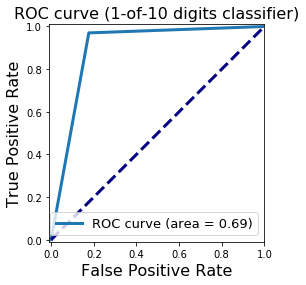

In [42]:
plot_roc_auc(tpr,fpr,roc_auc)

In [37]:
tpr, fpr

(array([0.        , 0.55172414, 1.        ]),
 array([0.        , 0.17647059, 1.        ]))

In [38]:
tpr = [0.,0.97,1.]